In [1]:
import rasterio
import rasterio.plot
# import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
# this function generates a boolean mask based on the population map
def pop2msk(pop):
    mask = (pop == pop )
    return mask;

In [2]:
mask_file = '../data/mask_clip_simple.tif'
pop_file = '../data/pop_clip_simple.tif'

population surface:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028230607370965e+38, 'width': 49, 'height': 39, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.008333333333332714, 0.0, -156.7916666666676,
       0.0, -0.008333333333333042, 21.05833261331081), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


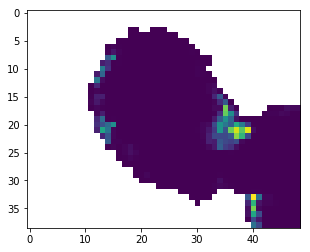

In [12]:
with rasterio.open(pop_file) as pop:
    
    print('population surface:')
    print(pop.profile)
    
    pop_crs = pop.crs
    pop_nodata = pop.nodata
    pop_profile = pop.profile.copy()
    pop_aff = pop.transform
    
    pop_np = pop.read(1)
    pop_np[pop_np == pop_nodata] = np.NaN;
    
    plt.imshow(pop_np)

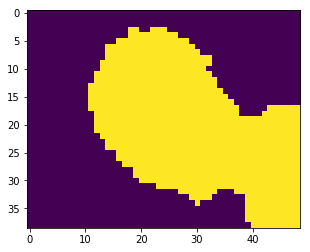

In [13]:
popmask = pop2msk(pop_np)
plt.imshow(popmask)

In [4]:
pop_np

array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [      nan,       nan,       nan, ..., 0.       , 0.       ,
        0.       ],
       [      nan,       nan,       nan, ..., 0.       , 0.       ,
        0.       ],
       [      nan,       nan,       nan, ..., 0.       , 0.       ,
        2.8030999]], dtype=float32)

mask surface:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 49, 'height': 39, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.008333333333332714, 0.0, -156.7916666666676,
       0.0, -0.008333333333333042, 21.058333333336094), 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


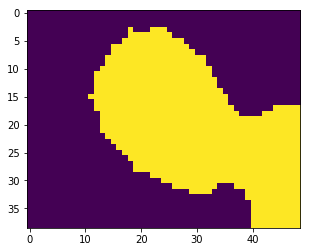

In [5]:
with rasterio.open(mask_file) as mask:
    
    print('mask surface:')
    print(mask.profile)
    
    mask_crs = mask.crs
    mask_nodata = mask.nodata
    mask_profile = mask.profile.copy()
    mask_aff = mask.transform
    # note the origin is slightly different beetween pop and mask
    
    mask_np = mask.read(1)
    mask_np[mask_np == mask_nodata] = 0
    
    mask_np = mask_np.astype(bool)
    plt.imshow(mask_np)

In [6]:
mask_np

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])